<a href="https://colab.research.google.com/github/NikhilMamilla/Delta/blob/main/Mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
file_path = 'Final_delta.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,age,gender,physical_health,mental_health,employment,sleep,stress,smoking,drinking
0,16,2,8,7,2,0,1,0,0
1,80,2,19,5,2,20,1,1,0
2,32,2,8,0,4,9,1,0,1
3,15,2,9,9,2,6,0,1,0
4,60,1,12,13,3,15,0,1,1


In [ ]:
df.tail()

,age,gender,physical_health,mental_health,employment,sleep,stress,smoking,drinking
69504,37,1,21,0,2,6,0,0,1
69505,56,2,11,7,4,7,1,1,1
69506,73,1,28,4,1,2,0,0,0
69507,40,2,5,27,3,20,1,1,0
69508,46,1,19,4,1,9,1,1,0


In [ ]:
print("Shape of the DataFrame:")
print(df.shape)

Shape of the DataFrame:
(69509, 9)


In [ ]:
print("Columns of the DataFrame:")
print(df.columns)

Columns of the DataFrame:
Index(['age', 'gender', 'physical_health', 'mental_health', 'employment',
       'sleep', 'stress', 'smoking', 'drinking'],
      dtype='object')


In [ ]:
print("Number of duplicated rows in the DataFrame:")
print(df.duplicated().sum())

Number of duplicated rows in the DataFrame:
63


In [ ]:
df = df.drop_duplicates()

In [ ]:
duplicates = df[df.duplicated()]
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [age, gender, physical_health, mental_health, employment, sleep, stress, smoking, drinking]
Index: []


In [ ]:
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())


Missing values in the DataFrame:
age                0
gender             0
physical_health    0
mental_health      0
employment         0
sleep              0
stress             0
smoking            0
drinking           0
dtype: int64


In [ ]:
print("Information about the DataFrame:")
print(df.info())

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 69446 entries, 0 to 69508
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              69446 non-null  int64
 1   gender           69446 non-null  int64
 2   physical_health  69446 non-null  int64
 3   mental_health    69446 non-null  int64
 4   employment       69446 non-null  int64
 5   sleep            69446 non-null  int64
 6   stress           69446 non-null  int64
 7   smoking          69446 non-null  int64
 8   drinking         69446 non-null  int64
dtypes: int64(9)
memory usage: 5.3 MB
None


In [ ]:
print("\nSummary statistics of the DataFrame:")
print(df.describe())


Summary statistics of the DataFrame:
                age        gender  physical_health  mental_health  \
count  69446.000000  69446.000000     69446.000000   69446.000000   
mean      45.947384      1.522939        10.189586      10.208709   
std       19.888284      0.499477         7.566460       7.562149   
min       12.000000      1.000000         0.000000       0.000000   
25%       29.000000      1.000000         4.000000       4.000000   
50%       46.000000      2.000000         9.000000       9.000000   
75%       63.000000      2.000000        15.000000      15.000000   
max       80.000000      2.000000        30.000000      30.000000   

         employment         sleep        stress       smoking      drinking  
count  69446.000000  69446.000000  69446.000000  69446.000000  69446.000000  
mean       2.499914      9.305648      0.500043      0.500058      0.499971  
std        1.118042      5.105779      0.500004      0.500004      0.500004  
min        1.000000      0.0

In [ ]:
feature_columns = ['age', 'gender', 'physical_health', 'mental_health', 'employment', 'sleep', 'stress', 'smoking', 'drinking']
target_column = 'mental_health'

X = data[feature_columns]
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model=RandomForestClassifier(random_state=42)

model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 86.81%
Precision: 0.86
Recall: 0.87
F1 Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       759
           1       1.00      1.00      1.00       790
           2       1.00      1.00      1.00       753
           3       1.00      1.00      1.00       716
           4       1.00      1.00      1.00       757
           5       1.00      1.00      1.00       725
           6       1.00      1.00      1.00       719
           7       1.00      1.00      1.00       790
           8       1.00      1.00      1.00       758
           9       1.00      1.00      1.00       744
          10       0.99      1.00      1.00       773
          11       0.95      0.98      0.96       396
          12       0.91      0.94      0.93       446
          13       0.86      0.89      0.88       452
          14       0.83      0.85      0.84       437
          15       0.83      0.87      0.85       

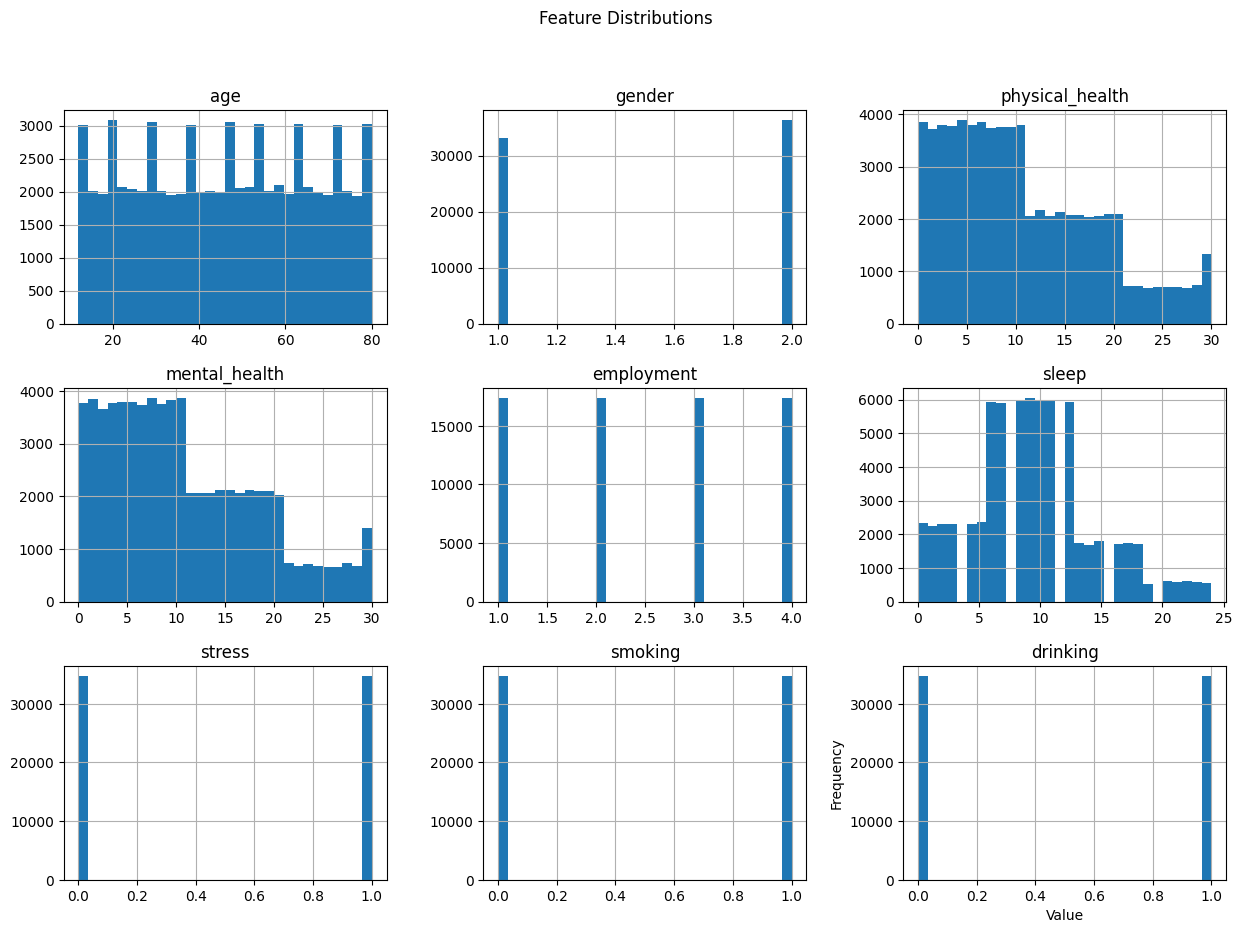

In [ ]:
# Plot histograms for each feature
X.hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

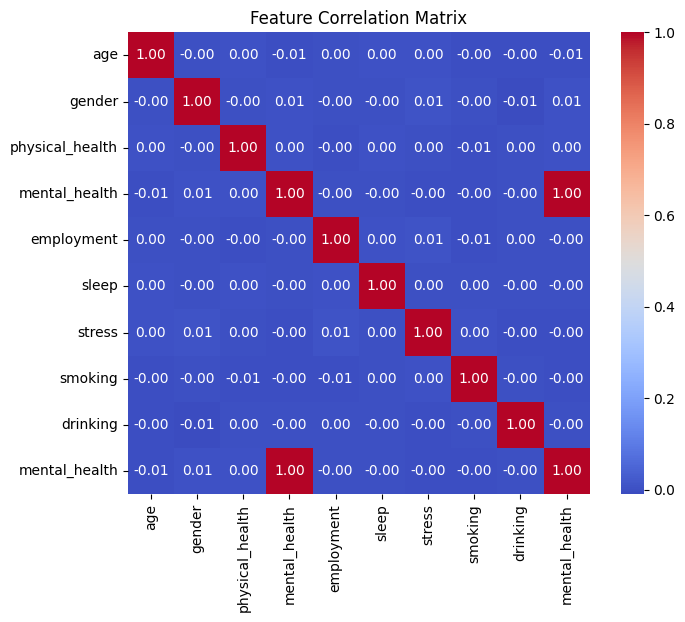

In [ ]:
import seaborn as sns

# Compute the correlation matrix
corr = data[feature_columns + [target_column]].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8,6))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

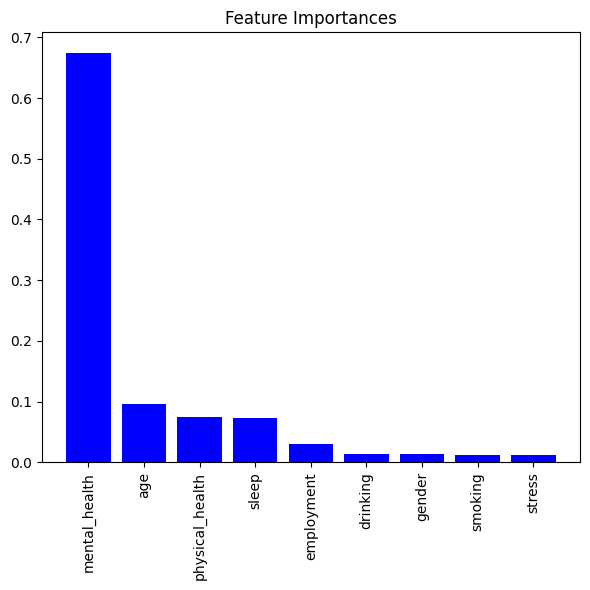

In [ ]:
feature_importances = clf.feature_importances_
features = feature_columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(6, 6))
plt.title('Feature Importances')
plt.bar(range(len(features)), feature_importances[indices], color='b', align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()



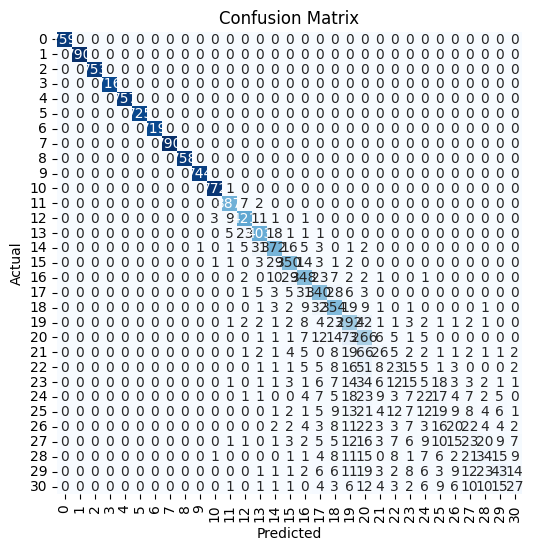

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: {:.2f}".format(cv_scores.mean()))


Cross-validation scores:  [0.8700187  0.87505395 0.86915552 0.8684362  0.87015323]
Mean cross-validation score: 0.87


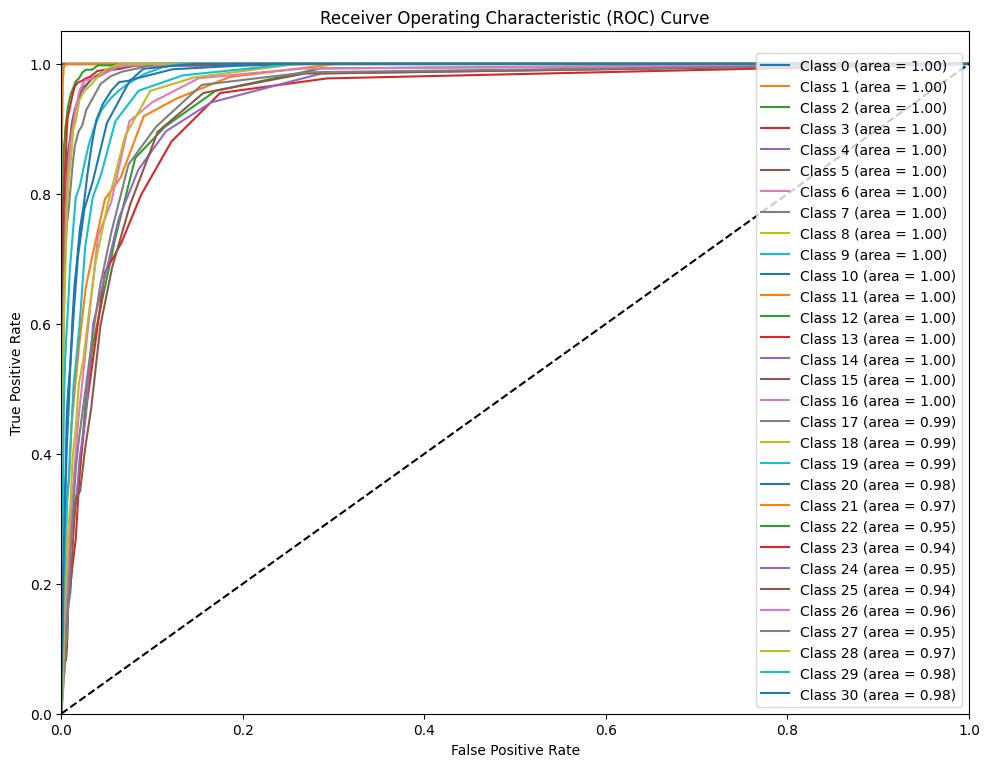

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], clf.predict_proba(X_test_scaled)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()
